# Análise de dados
Bike Sharing Dataset

## Definição do data set
O data set abrnage os dados de um sistema de aluguel de bike chamado Capital bikeshare system.
No período dos anos de 2011 e 2012.
São em torno de 17 mil linhas referentes aos horários e dias dos aluguéis bem como dados referentes sazonais e de clima.
### Sobre a capital bikeshare
https://www.capitalbikeshare.com/about

Capital Bike share é um sistema de compartilhamento de bicicletas com mais de 4300 bicicletas disponiveis em 500 estações distribuidas em 6 grandes regioes: Washington, DC; Arlington, VA; Alexandria, VA; Montgomery County, MD; Prince George's County, MD; and Fairfax County, VA

As bicicletas podem ser desbloqueadas e devolvidas em qualquer uma das estações.

Já atingiram o marco de 20 milhoes de corridas.

Trabalham com um sistema de single trip no valor 2 dólares ou um passe de 24horas no valor de 8 dólares ou ainda uma assinatura anual de 85 dolares para uso ilimitado de corridas. Em todos os formatos espera-se corridas com tempo inferior a 30 minutos.

## Questões de pesquisa
### Questionamentos iniciais
- Quem são os usuários do sistema e como eles se comportam durante os dias?

### Refinamento
- É possivel encontrar um padrão no uso do sistema baseado no tipo de usuarios do serviço (casuais e registrados)?
- há um período de maior fluxo de viagens? 
- Como é possível descrever o perfil dos usuários do sistema?

## Data Wrangling (Limpeza dos dados)

## Importa todas as bibliotecas necessárias

In [1]:
%matplotlib inline
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from IPython.display import display


## Definição dos arquivos

In [2]:
sample_data = pd.read_csv('day.csv')
sample_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
sample_data_hours = pd.read_csv('hour.csv')
sample_data_hours.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## definição dos arquivos
O data set vem com dois arquivos: day.csv e hour.csv
Os dois possuem as mesmas colunas exceto pela coluna HR que está presente apenas no arquivo hour.csv.

IMPORTANTE: Decidi então trabalhar apenas com o arquivo hour.csv representa as corridas em determina hora do dia.

Primeiramente extraí apenas os dados do primeiro mes de maneira a trabalhar com todos os dados apenas no final do processamento de limpeza, afim de ser mais rapido nessa fase analisando apenas parte dos dados.

In [4]:
file_in  = 'hour.csv'
file_out = '201101_hour.csv'
with open(file_out, 'w') as f_out, open(file_in, 'r') as f_in:
    # configura o leitor de csv
    in_reader = csv.reader(f_in)
    out_writer = csv.writer(f_out)

    # escreve os dados no arquivo de saída até que a data limite seja atingida
    while True:
        datarow = next(in_reader)
        # data de início de das viagens na segunda coluna no formato 'yyyy-mm-dd'
        if datarow[1][:7] == '2011-02':
            break
        out_writer.writerow(datarow)

In [5]:
def summarise_data(trip_in, trip_out):
    with open(trip_out, 'w') as f_out:
        # configura o objeto de escrita de csv       
        out_colnames = ['dteday', 'day', 'month', 'year', 'hour', 
                        'holiday', 'weekday', 'workingday',
                        'casual', 'registered', 'cnt']
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        for data_file in trip_in:
            with open(data_file, 'r') as f_in:
                trip_reader = csv.DictReader(f_in)
                for row in trip_reader:
                    new_point = {}
                    trip_date = datetime.strptime(row['dteday'], '%Y-%m-%d')
                    new_point['day']  = trip_date.day
                    new_point['month'] = trip_date.month
                    new_point['year']  = trip_date.year
                    new_point['hour']  = row['hr']
                    new_point['holiday']  = row['holiday']
                    new_point['weekday']  = trip_date.weekday()
                    new_point['workingday']  = row['workingday']                    
                    new_point['casual']  = row['casual']
                    new_point['registered']  = row['registered']
                    new_point['cnt']  = row['cnt']
                    new_point['dteday']  = row['dteday']
                    trip_writer.writerow(new_point)

                    

In [6]:
trip_in = ['201101_hour.csv']
trip_out = '201101_hour_summary.csv'
summarise_data(trip_in, trip_out)

In [7]:
sample_data = pd.read_csv('201101_hour_summary.csv')
display(sample_data.head())

,dteday,day,month,year,hour,holiday,weekday,workingday,casual,registered,cnt
0,2011-01-01,1,1,2011,0,0,5,0,3,13,16
1,2011-01-01,1,1,2011,1,0,5,0,8,32,40
2,2011-01-01,1,1,2011,2,0,5,0,5,27,32
3,2011-01-01,1,1,2011,3,0,5,0,3,10,13
4,2011-01-01,1,1,2011,4,0,5,0,0,1,1


## Análise Exploratória de Dados


In [8]:
trip_in = ['hour.csv']
trip_out = 'hour_summary.csv'
summarise_data(trip_in, trip_out)
trip_data = pd.read_csv('hour_summary.csv')
display(trip_data.head())

,dteday,day,month,year,hour,holiday,weekday,workingday,casual,registered,cnt
0,2011-01-01,1,1,2011,0,0,5,0,3,13,16
1,2011-01-01,1,1,2011,1,0,5,0,8,32,40
2,2011-01-01,1,1,2011,2,0,5,0,5,27,32
3,2011-01-01,1,1,2011,3,0,5,0,3,10,13
4,2011-01-01,1,1,2011,4,0,5,0,0,1,1


In [9]:
print('Os dias mais calmos tiveream apenas {:d} corrida.\n'.format(trip_data.cnt.min()))
trip_data.index[trip_data['cnt'] == trip_data.cnt.max()].tolist()
when = trip_data['dteday'][14773]
print('Já o dia mais agitado foi no dia {:s} e teve {:d} corridas\n'.format(when, trip_data.cnt.max()))



Os dias mais calmos tiveream apenas 1 corrida.

Já o dia mais agitado foi no dia 2012-09-12 e teve 977 corridas



![ok](search.png)

In [10]:
print('Existem {:d} pontos no conjunto de dados\n'.format(trip_data.shape[0]))
print('A média de viagem por hora foi de {:.2f}.'.format(trip_data.cnt.mean()))
print('sendo {:.2f} representados por usuarios casuais.'.format(trip_data.casual.mean()))
print('e {:.2f} por usuarios registrados. \n'.format(trip_data.registered.mean()))
print('A mediana do numero de viagens foi de {:.2f}.'.format(trip_data.cnt.median()))
print('sendo {:.2f} a mediana para usuários casuais.'.format(trip_data.casual.median()))
print('e {:.2f} a mediana para usuários registrados.\n'.format(trip_data.registered.median()))

cnt_qtiles = trip_data['cnt'].quantile([.25, .5, .75]).values
print('25% das horas tiveram menos que {:.2f} usuários'.format(cnt_qtiles.min()))
print('25% das horas tiveram mais {:.2f} usuários '.format(cnt_qtiles.max()))

Existem 17379 pontos no conjunto de dados

A média de viagem por hora foi de 189.46.
sendo 35.68 representados por usuarios casuais.
e 153.79 por usuarios registrados. 

A mediana do numero de viagens foi de 142.00.
sendo 17.00 a mediana para usuários casuais.
e 115.00 a mediana para usuários registrados.

25% das horas tiveram menos que 40.00 usuários
25% das horas tiveram mais 281.00 usuários 


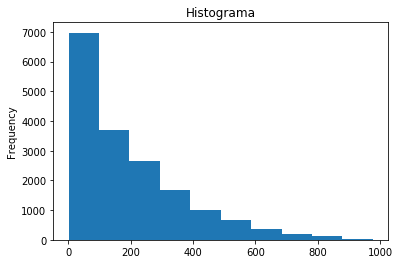

In [11]:
import matplotlib.pyplot as plt
trip_data.cnt.plot.hist();
plt.title('Histograma')
plt.show();

## Interpretação dos resultados
O Histograma acima exibe a frequencia de ocorrencias do totais de viagens por hora.

Casual         620017
Registered    2672662
dtype: int64


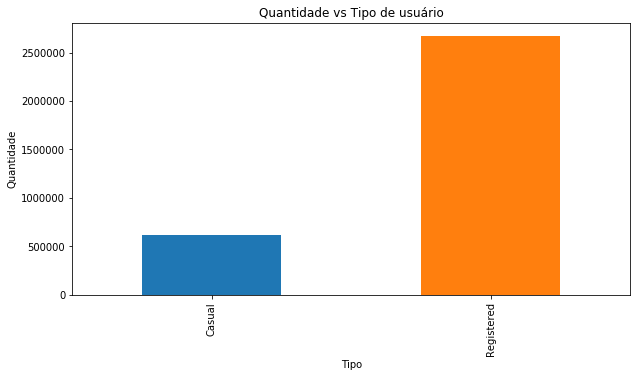

In [12]:


total_casual = trip_data.casual.sum()
total_registered = trip_data.registered.sum()
counts = pd.Series([total_casual,total_registered], index=['Casual', 'Registered'])

counts.plot.bar(figsize=(10, 5), title='Quantidade vs Tipo de usuário')

print(counts)
plt.ylabel('Quantidade')
plt.xlabel('Tipo')
plt.show()

## Interpretação dos resultados
Podemos afirmar que maior renda do serviço vem por parte de usuários do tipo **registrados**. 

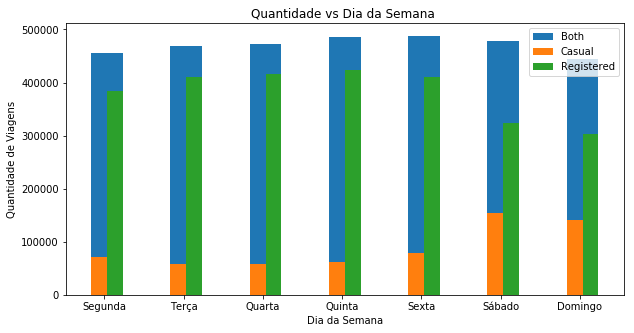

In [13]:

tick_labels_weekday = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
ind_weekday = np.arange(len(tick_labels_weekday))
tamanho_weekday = 0.20

ticks_weekday = ind_weekday + tamanho_weekday / 3

casual_weekday = trip_data.groupby('weekday').sum().casual
registered_weekday = trip_data.groupby('weekday').sum().registered
both_weekday = trip_data.groupby('weekday').sum().cnt

plt.figure(figsize=(10, 5))

plt.bar(ind_weekday + tamanho_weekday/2, both_weekday, tamanho_weekday* 2)
plt.bar(ind_weekday, casual_weekday, tamanho_weekday)
plt.bar(ind_weekday + tamanho_weekday, registered_weekday, tamanho_weekday)


plt.title('Quantidade vs Dia da Semana ')
plt.xlabel('Dia da Semana')
plt.xticks(ticks_weekday, tick_labels_weekday)
plt.ylabel('Quantidade de Viagens')
plt.legend(['Both', 'Casual', 'Registered', ])
plt.show();

# Interpretação dos resultados
Pude observar uma pouca diminuição no número de viagens nos finais de semana com relacao aos demais dias. Esse equilíbrio se deu graças ao aumento de viagens dos usuários **casuais**, já que há uma queda considerável no número de viagens do tipo **registered**

Interessante notar o aumento de viagens por parte dos usuários **casuais** nos finais de semana ocorra por esses dias serem mais propensos a atividades de lazer e turismo.

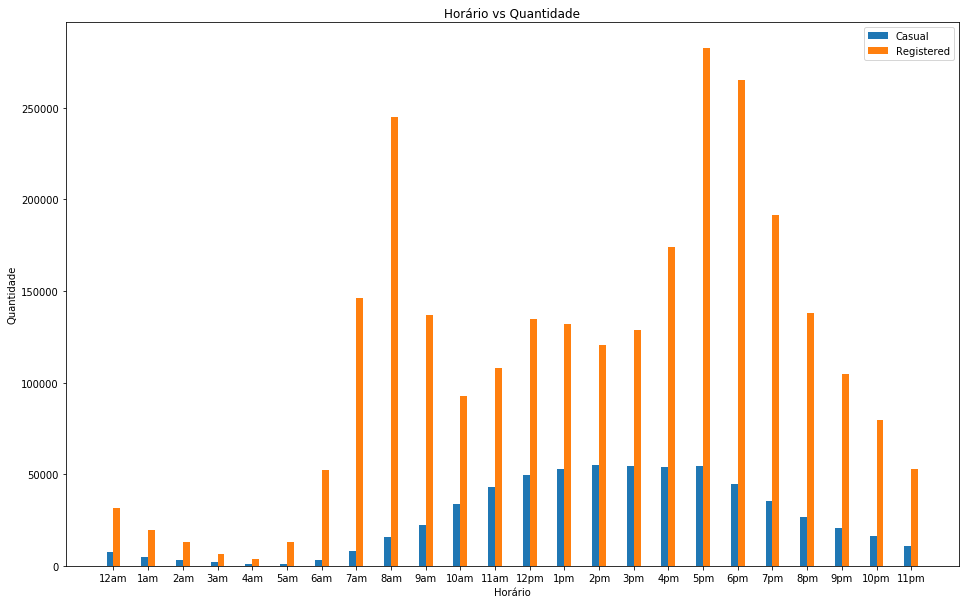

In [14]:
tick_labels_hour = ['12am', '1am', '2am', '3am', '4am', '5am','6am',
               '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm',
               '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
ind_hour = np.arange(len(tick_labels_hour))
tamanho_hour = 0.2

ticks_hour = ind_hour + tamanho_hour / 2

trips_casual = trip_data.groupby('hour').sum().casual
trips_registered = trip_data.groupby('hour').sum().registered
# trips_casual.plot.bar()

plt.figure(figsize=(16, 10))
plt.bar(ind_hour, trips_casual, tamanho_hour)
plt.bar(ind_hour + tamanho_hour, trips_registered, tamanho_hour)

plt.title('Horário vs Quantidade')
plt.ylabel('Quantidade')
plt.xlabel('Horário')
plt.xticks(ticks_hour, tick_labels_hour)
plt.legend(['Casual', 'Registered'])

plt.show();


## Interpretação dos resultados
É interessante notar o pico no inicio da manhã e final da tarde dos 
usuários do tipo **registered**, provavelmente alguma relação com o horário de entrada e saída 
de trabalho.

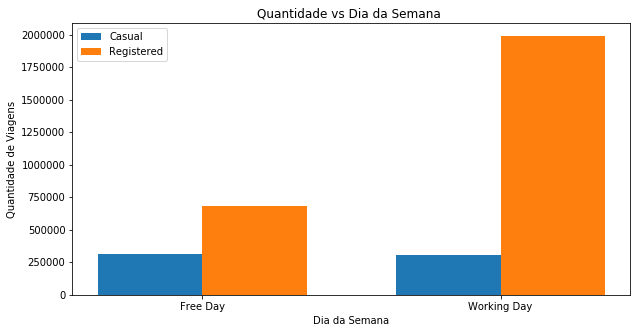

In [15]:
tick_labels_weekday = ['Free Day', 'Working Day']
ind_weekday = np.arange(len(tick_labels_weekday))
tamanho_weekday = 0.35

ticks_weekday = ind_weekday + tamanho_weekday / 2

casual_weekday = trip_data.groupby('workingday').sum().casual
registered_weekday = trip_data.groupby('workingday').sum().registered

plt.figure(figsize=(10, 5))
plt.bar(ind_weekday, casual_weekday, tamanho_weekday)
plt.bar(ind_weekday + tamanho_weekday, registered_weekday, tamanho_weekday)

plt.title('Quantidade vs Dia da Semana ')
plt.xlabel('Dia da Semana')
plt.xticks(ticks_weekday, tick_labels_weekday)
plt.ylabel('Quantidade de Viagens')
plt.legend(['Casual', 'Registered'])
plt.show();

## Interpretação dos resultados
O comportamento dos usuários **casuais** é praticamente o mesmo nos dias de trabalho e nos dias livres.

Já o comportamento dos usuários **registered** é bem diferente. eles usam mais o serviço em dias de trabalho que em dias livres.

## Fonte dos dados
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
### Citation Request:
Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, [doi:10.1007/s13748-013-0040-3]. 